# Correlation and Experimental Design

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, norm, poisson, expon

# Loading datasets
spotify = pd.read_csv("datasets/spotify.csv")
heart = pd.read_csv("datasets/heart.csv")
world_happiness = pd.read_csv("datasets/world_happiness.csv")

spotify.rename(columns={"top genre": "genre"}, inplace=True)
heart['sex'] = heart['sex'].replace({1: 'Male', 0: 'Female'})

## 1. Correlation Analysis

Visualizing the relationship between variables using a scatter plot is a key step in data analysis, especially for understanding correlations.

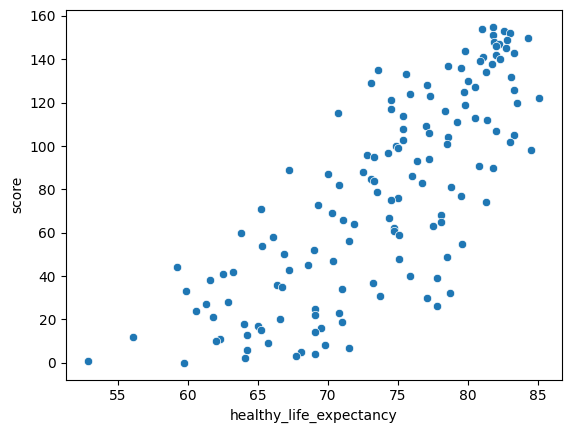

In [2]:
# This plot will visually represent the relationship between 'healthy_life_expectancy' and 'score'
sns.scatterplot(x="healthy_life_expectancy", y="score", data=world_happiness)

# Displaying the plot
plt.show()

Visualizing a linear regression line within a scatter plot is indeed an effective method to demonstrate the linear relationship between two variables. 

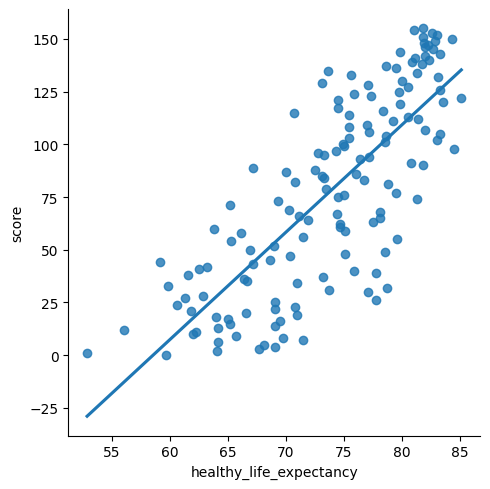

In [3]:
# Creating a scatter plot with a linear regression model fit
# ci=None: This parameter disables the confidence interval around the regression line.
#         The confidence interval represents the range in which we expect the true regression line to be,
#         based on the data. Setting it to 'None' makes the plot cleaner if the interval is not needed for analysis.
sns.lmplot(x="healthy_life_expectancy", y="score", data=world_happiness, ci=None)

# Displaying the plot
plt.show()

## Pearson Correlation

The '.corr()' method is used to compute the Pearson correlation coefficient, which measures the linear relationship between two variables. Here, we're specifically looking at the correlation between 'healthy_life_expectancy' and 'score'. A positive correlation indicates that as one variable increases, the other tends to increase as well. A negative correlation indicates the opposite. A correlation close to 0 suggests no strong linear relationship between the variables. 

Correlation coefficient will range between -1 and 1, with -1 indicating a perfect negative linear correlation, 0 indicating no linear correlation, and 1 indicating a perfect positive linear correlation.

In [4]:
# Calculating the correlation between healthy life expectancy and happiness score
cor = world_happiness['healthy_life_expectancy'].corr(world_happiness['score'])

# Printing the correlation coefficient
# This value will range between -1 and 1, with -1 indicating a perfect negative linear correlation,
# 0 indicating no linear correlation, and 1 indicating a perfect positive linear correlation.
print(cor)

0.7802249053272062


## 2. Transformations

When evaluating the graphical representation provided, it becomes apparent that a significant relationship exists between the depicted variables. However, the Pearson correlation coefficient, which measures linear relationships, does not adequately reflect this association. This discrepancy arises because the interaction between the variables in question is non-linear, and the Pearson method primarily captures linear correlations. Consequently, while the plot visually indicates a strong connection, the Pearson correlation may not effectively represent the true nature of the relationship due to its linear focus. Alternative statistical methods that account for non-linear relationships might be more suitable for accurately quantifying the observed interaction.

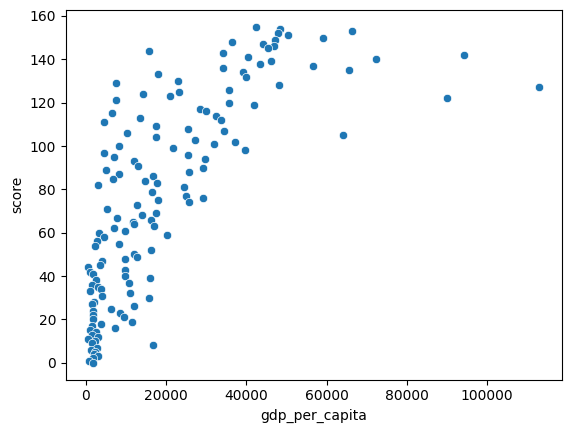

0.727973301222298


In [5]:
# Scatterplot of score vs. gdp_per_capita
sns.scatterplot(x='gdp_per_capita', y='score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_capita'].corr(world_happiness['score'])

print(cor)

Upon careful analysis of the graph presented, it is observed that the relationship between the variables exhibits a logarithmic nature. To address this, a transformation involving the logarithm of the "gdp_per_capita" variable is proposed. This transformation aims to linearize the relationship, thereby enhancing its interpretability and alignment with linear statistical models.

As demonstrated in the subsequent graph, post-transformation, the relationship between the variables becomes more linear. This adjustment leads to a notable increase in the Pearson correlation coefficient, which is more adept at capturing linear relationships. The enhanced linearity and increased correlation coefficient are particularly advantageous for the performance of linear predictive models. Such models rely heavily on linear relationships between variables, and this transformation effectively aligns the data with the underlying assumptions of these models, potentially leading to more accurate and reliable predictions.

Other transformation methods like exponential transformation, Box-Cox transformation, and square root transformation can also be employed to linearize the relationship between variables, enhancing the performance of linear models.

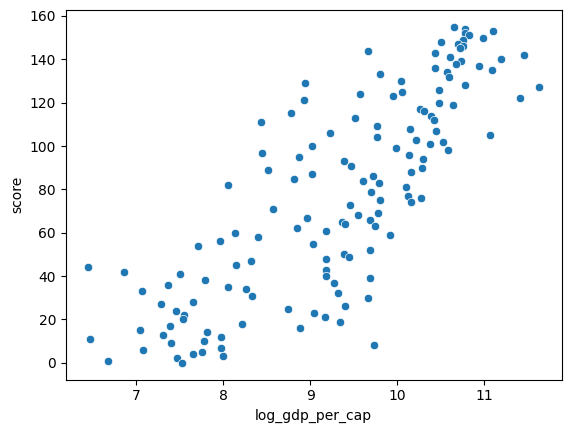

0.8043146004918288


In [6]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_capita'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['score'])
print(cor)